In [1]:
import pandas as pd

In [17]:
df = pd.read_csv('InterpolatedNum.csv')

In [3]:
df

,DATES,U REVENUE,D CR,U OE,U NOI,D CAPEX,D CWK,U FCF
0,2009-12-31,2516.599342,874.898921,598.309344,149.053332,401.606865,5300.000000,1054.796450
1,2010-01-31,2517.269135,860.939613,579.449753,154.310757,401.486532,5284.925049,1034.520192
2,2010-02-28,2517.938928,846.980305,560.590161,159.568183,401.366199,5269.850098,1014.243935
3,2010-03-31,2518.608721,833.020996,541.730570,164.825608,401.245866,5254.775146,993.967677
4,2010-04-30,2499.253524,833.871453,533.857486,143.783793,401.861529,5138.105587,968.315638
...,...,...,...,...,...,...,...,...
104,2018-08-31,2868.128469,588.943082,608.691733,568.627944,85.443487,2157.205350,971.964143
105,2018-09-30,2948.610830,587.220525,610.197038,552.970759,87.610502,2106.896131,891.926215
106,2018-10-31,2640.585195,557.651821,617.222494,541.626011,86.484111,2063.564228,884.711110
107,2018-11-30,2332.559561,528.083117,624.247951,530.281263,85.357719,2020.232325,877.496005


In [4]:
dataset = df.values

In [5]:
dataset

array([['2009-12-31', 2516.5993423666, 874.898921304628,
        598.3093439944851, 149.053332177893, 401.60686533687897, 5300.0,
        1054.79645008462],
       ['2010-01-31', 2517.2691352041434, 860.939612914402,
        579.4497525176148, 154.31075747099834, 401.486532380373,
        5284.92504882464, 1034.5201924589232],
       ['2010-02-28', 2517.938928041687, 846.9803045241761,
        560.5901610407443, 159.56818276410363, 401.36619942386704,
        5269.850097649281, 1014.2439348332268],
       ['2010-03-31', 2518.60872087923, 833.02099613395,
        541.7305695638739, 164.825608057209, 401.245866467361,
        5254.77514647392, 993.9676772075301],
       ['2010-04-30', 2499.253523608567, 833.8714529907679,
        533.8574856893313, 143.78379333166032, 401.8615286757547,
        5138.10558725425, 968.3156379250456],
       ['2010-05-31', 2479.898326337903, 834.7219098475861,
        525.9844018147886, 122.74197860611167, 402.47719088414834,
        5021.436028034581, 942.

In [6]:
X = dataset[:,1:7]
Y = dataset[:,7]

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [8]:
X_scale

array([[0.38207107, 0.30088635, 0.66065554, 0.09504047, 0.36704178,
        1.        ],
       [0.38259114, 0.2897271 , 0.61579353, 0.10559242, 0.36690397,
        0.99604307],
       [0.38311121, 0.27856786, 0.57093152, 0.11614437, 0.36676616,
        0.99208614],
       [0.38363128, 0.26740862, 0.5260695 , 0.12669631, 0.36662835,
        0.98812921],
       [0.36860266, 0.26808849, 0.50734151, 0.08446421, 0.36733342,
        0.95750536],
       [0.35357405, 0.26876835, 0.48861351, 0.0422321 , 0.36803849,
        0.9268815 ],
       [0.33854544, 0.26944822, 0.46988551, 0.        , 0.36874357,
        0.89625765],
       [0.31068633, 0.26625698, 0.45192594, 0.01207106, 0.36828353,
        0.89167692],
       [0.28282723, 0.26306574, 0.43396637, 0.02414213, 0.3678235 ,
        0.88709619],
       [0.25496812, 0.2598745 , 0.4160068 , 0.03621319, 0.36736347,
        0.88251546],
       [0.37430795, 0.27407583, 0.39979865, 0.02861009, 0.38583753,
        0.85420062],
       [0.49364777, 0

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(87, 6) (11, 6) (11, 6) (87,) (11,) (11,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(6,)),
    Dense(128, activation='elu'),
    Dense(128, activation='elu'),
    Dense(128, activation='elu'),
    Dense(128, activation='elu'),
    Dense(1, activation='elu'),
])

In [13]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [14]:
hist = model.fit(X_train, Y_train, batch_size=8, epochs=300, validation_data=(X_val, Y_val))

Train on 87 samples, validate on 11 samples
Epoch 1/300
87/87 [==============================] - 0s 4ms/step - loss: 1355.8730 - val_loss: 1349.4243
Epoch 2/300
87/87 [==============================] - 0s 379us/step - loss: 1265.6520 - val_loss: 1193.4703
Epoch 3/300
87/87 [==============================] - 0s 379us/step - loss: 994.7817 - val_loss: 801.3338
Epoch 4/300
87/87 [==============================] - 0s 391us/step - loss: 486.1043 - val_loss: 430.8752
Epoch 5/300
87/87 [==============================] - 0s 368us/step - loss: 307.2067 - val_loss: 347.1553
Epoch 6/300
87/87 [==============================] - 0s 471us/step - loss: 286.4652 - val_loss: 332.5332
Epoch 7/300
87/87 [==============================] - 0s 471us/step - loss: 271.8630 - val_loss: 346.1609
Epoch 8/300
87/87 [==============================] - 0s 368us/step - loss: 263.8967 - val_loss: 336.0406
Epoch 9/300
87/87 [==============================] - 0s 425us/step - loss: 251.0174 - val_loss: 284.3628
Epoch 10/

87/87 [==============================] - 0s 402us/step - loss: 73.5386 - val_loss: 110.9062
Epoch 79/300
87/87 [==============================] - 0s 437us/step - loss: 84.1302 - val_loss: 105.3188
Epoch 80/300
87/87 [==============================] - 0s 402us/step - loss: 82.8594 - val_loss: 85.0470
Epoch 81/300
87/87 [==============================] - 0s 379us/step - loss: 75.7128 - val_loss: 121.8023
Epoch 82/300
87/87 [==============================] - 0s 425us/step - loss: 74.1375 - val_loss: 91.7988
Epoch 83/300
87/87 [==============================] - 0s 425us/step - loss: 81.6258 - val_loss: 93.0117
Epoch 84/300
87/87 [==============================] - 0s 379us/step - loss: 76.2319 - val_loss: 90.6413
Epoch 85/300
87/87 [==============================] - 0s 414us/step - loss: 76.2672 - val_loss: 97.7835
Epoch 86/300
87/87 [==============================] - 0s 414us/step - loss: 74.8042 - val_loss: 91.2264
Epoch 87/300
87/87 [==============================] - 0s 402us/step - loss

Epoch 156/300
87/87 [==============================] - 0s 425us/step - loss: 67.6801 - val_loss: 94.6952
Epoch 157/300
87/87 [==============================] - 0s 414us/step - loss: 72.6724 - val_loss: 110.3482
Epoch 158/300
87/87 [==============================] - 0s 483us/step - loss: 71.9744 - val_loss: 117.7626
Epoch 159/300
87/87 [==============================] - 0s 460us/step - loss: 79.1866 - val_loss: 91.9705
Epoch 160/300
87/87 [==============================] - 0s 460us/step - loss: 74.6019 - val_loss: 130.5669
Epoch 161/300
87/87 [==============================] - 0s 448us/step - loss: 74.4727 - val_loss: 101.2183
Epoch 162/300
87/87 [==============================] - 0s 402us/step - loss: 80.1012 - val_loss: 91.9563
Epoch 163/300
87/87 [==============================] - 0s 419us/step - loss: 70.9954 - val_loss: 96.7540
Epoch 164/300
87/87 [==============================] - 0s 402us/step - loss: 68.7113 - val_loss: 95.4022
Epoch 165/300
87/87 [==============================

87/87 [==============================] - 0s 368us/step - loss: 70.4195 - val_loss: 94.6249
Epoch 234/300
87/87 [==============================] - 0s 402us/step - loss: 77.5423 - val_loss: 100.2486
Epoch 235/300
87/87 [==============================] - 0s 368us/step - loss: 71.7353 - val_loss: 109.7369
Epoch 236/300
87/87 [==============================] - 0s 379us/step - loss: 67.5573 - val_loss: 109.1455
Epoch 237/300
87/87 [==============================] - 0s 368us/step - loss: 72.7078 - val_loss: 98.0550
Epoch 238/300
87/87 [==============================] - 0s 414us/step - loss: 71.0321 - val_loss: 115.5751
Epoch 239/300
87/87 [==============================] - 0s 395us/step - loss: 70.7774 - val_loss: 121.2253
Epoch 240/300
87/87 [==============================] - 0s 391us/step - loss: 73.5655 - val_loss: 94.1385
Epoch 241/300
87/87 [==============================] - 0s 368us/step - loss: 76.2422 - val_loss: 105.6855
Epoch 242/300
87/87 [==============================] - 0s 437us

In [15]:
import matplotlib.pyplot as plt

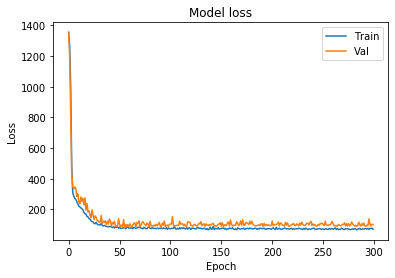

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()